In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

df = pd.read_excel ('bearing-unsup.xlsx')
df.drop(df.columns[0], axis=1,inplace=True)
display(df)
X_conAnomalias = np.array(df)

,rps,p2p,std,kurt,entro,crest,skewness,cenfreq,stdfreq,domfreq
0,14.307969,0.034390,0.003851,0.713983,14.106049,4.790768,0.046665,3419.720323,7775.145046,4955
1,15.024038,0.033479,0.004023,0.241707,14.191996,4.619703,-0.136264,3538.439582,8322.224662,4955
2,15.024038,0.031518,0.004195,0.132659,14.199525,3.935607,0.026957,3325.971210,7672.572125,4955
3,15.578686,0.033915,0.004205,0.267163,14.180472,4.042173,-0.054884,2496.585106,3596.784408,4955
4,16.276042,0.029362,0.004354,-0.012080,14.242593,3.620787,0.048537,3607.763602,8562.095291,4955
...,...,...,...,...,...,...,...,...,...,...
2995,21.701389,0.553307,0.029428,19.559926,12.320488,9.943409,0.141315,3025.695834,4877.364036,1120
2996,21.701389,0.559233,0.022701,23.230680,12.744078,12.554286,-0.292716,4927.933014,11458.398483,1595
2997,21.701389,0.751598,0.028305,33.674119,12.102589,14.342625,-0.082989,4892.559843,11078.956062,1145
2998,21.909674,0.559624,0.029708,17.693031,12.659644,9.466071,-0.119495,3356.100238,7077.069023,1155


### Ejercicio 1

In [4]:
clf = OneClassSVM(kernel='rbf', nu=0.033).fit(X_conAnomalias)
y_predict = clf.predict(X_conAnomalias)

X = X_conAnomalias[y_predict == 1]
display(len(X))

2901

### Ejercicio 2

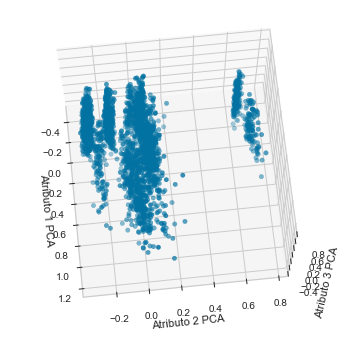

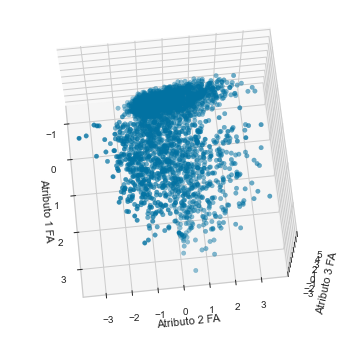

In [5]:
scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
X_p = pca.fit(X_scaled)
X_p = pca.transform(X_scaled)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(projection='3d')
ax.view_init(71, -6)
ax.scatter(X_p[:, 0], X_p[:, 1], X_p[:, 2])
ax.set_xlabel("Atributo 1 PCA"), ax.set_ylabel("Atributo 2 PCA"), ax.set_zlabel("Atributo 3 PCA")
plt.show()

fa = FactorAnalysis(n_components=3)
X_f = fa.fit(X_scaled)
X_f = fa.transform(X_scaled)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(projection='3d')
ax.view_init(71, -6)
ax.scatter(X_f[:, 0], X_f[:, 1], X_f[:, 2])
ax.set_xlabel("Atributo 1 FA"), ax.set_ylabel("Atributo 2 FA"), ax.set_zlabel("Atributo 3 FA")
plt.show()

# En las figuras se visualiza que se tiene una mejor agrupacion de datos respecto a sus caracteristicas en PCA que en FA, 
# ya que en la segunda mencionada no se diferencian agrupaciones entre si.

### Ejercicio 3

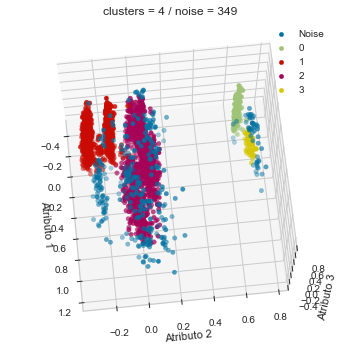

In [36]:
estimator = DBSCAN(eps=0.08, min_samples=13)
estimator.fit(X_p[:, [0, 1, 2]])
labels = estimator.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #cantidad grupos
n_noise = list(labels).count(-1) #observaciones ruido
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(8,6)
ax.view_init(71, -6)
for i in range(-1, n_clusters):
    ax.scatter(X_p[:, 0][labels == i], X_p[:, 1][labels == i], X_p[:, 2][labels == i])
ax.set_xlabel("Atributo 1"), ax.set_ylabel("Atributo 2"), ax.set_zlabel("Atributo 3")
ax.set_title('clusters = ' + str(n_clusters) + ' / ' + 'noise = ' + str(n_noise))
ax.legend([*['Noise'],*range(n_clusters)])
plt.show()

### Ejercicio 4

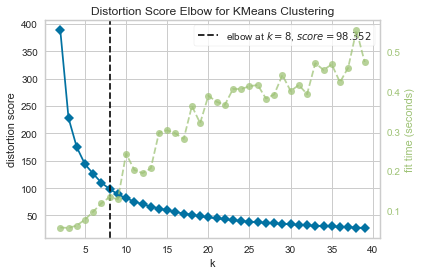

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Se recurre a la libreria yellowbrick para aplicar dos metodos de determinación óptima de cantidad de grupos
# Primero elbow
# Se observa una curva suave, por lo que el método elbow no es apropiado
visualizer = KElbowVisualizer(KMeans(), k=(2,40))
visualizer.fit(X_p)
visualizer.show()

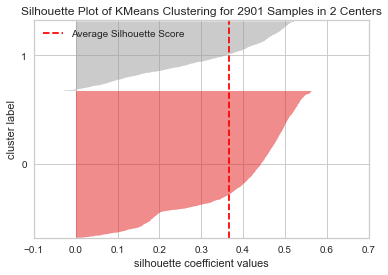

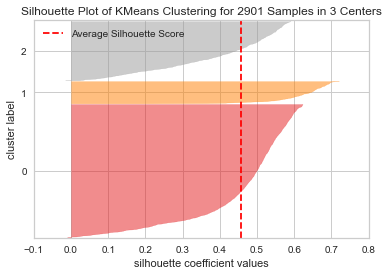

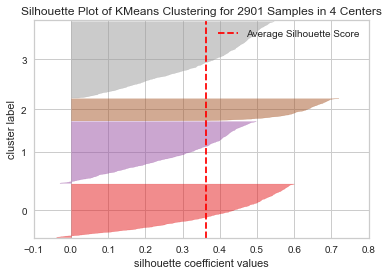

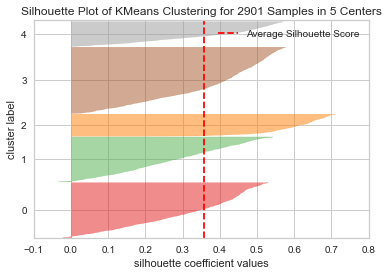

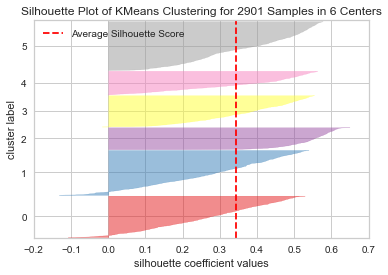

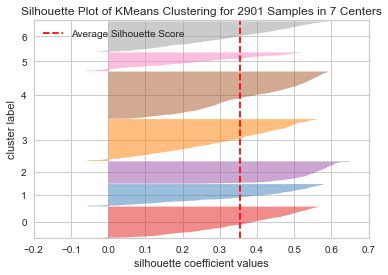

In [35]:
# Determinación con silhouette
# La puntuación más alta se logra con 3 clusters
for i in range(2,8):
    visualizer = SilhouetteVisualizer(KMeans(i))
    visualizer.fit(X_p)
    visualizer.show()

### Ejercicio 5

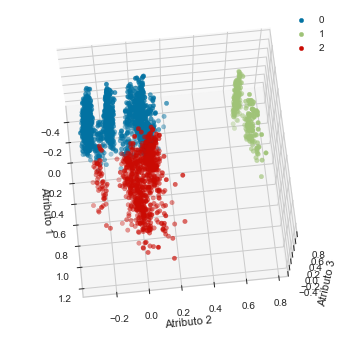

In [42]:
n = 3
estimator = KMeans(n_clusters=n)
estimator.fit(X_p[:, [0, 1, 2]])
labels = estimator.labels_
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(8,6)
ax.view_init(71, -6)
for i in range(n):
    ax.scatter(X_p[:, 0][labels == i], X_p[:, 1][labels == i], X_p[:, 2][labels == i])
ax.set_xlabel("Atributo 1"), ax.set_ylabel("Atributo 2"), ax.set_zlabel("Atributo 3")
ax.legend(range(n))
plt.show()

# Se observa un agrupamiento similar al caso de DBSCAN.
# Los datos a la izquierda de la figura se separan diferente,
# Quizá el criterio es que los datos azules están más densos que los rojos.

### Ejercicio 6

[[-0.15278909 -0.11882144 -0.00128819]
 [-0.17630364  0.68001803 -0.04553321]
 [ 0.4093776   0.01232607  0.01994844]]


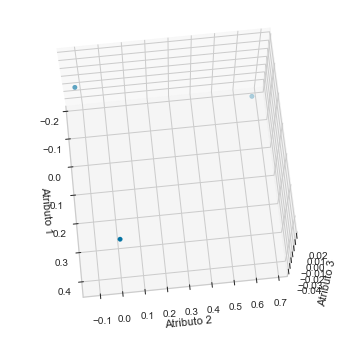

Los centros en 10 dimensiones son los siguientes:
[[ 0.71575475  0.0761647   0.18765567  0.01902822  0.97498544  0.29987181
   0.01912346  0.52846706  0.49350456  0.17626716]
 [ 0.63166563  0.11200639  0.30988106 -0.00576519  0.97892777  0.24586557
  -0.02369437  0.54721528  0.46343746  0.95775586]
 [ 0.76476279  0.38520852  0.51448018  0.20686545  0.88846539  0.56549012
  -0.04611001  0.52320246  0.4171237   0.25055806]]


In [43]:
center = estimator.cluster_centers_
print(center)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(8,6)
ax.view_init(71, -6)
ax.scatter(center[:, 0], center[:, 1], center[:, 2])
ax.set_xlabel("Atributo 1"), ax.set_ylabel("Atributo 2"), ax.set_zlabel("Atributo 3")
plt.show()

#transformando a dimensionalidad 10 los centros

center_diez = pca.inverse_transform(center)

print('Los centros en 10 dimensiones son los siguientes:')
print(center_diez)